# Задание 21
### Прошутинский Дмитрий, группа М01-815а

Предсказание площади лесных пожаров. На основе погодных измерений необходимо предсказать объем выгоревших лесных массивов на севере Португалии. Выборка состоит из 13 признаков и 517 объектов. Для решения задачи предлагается использовать метод наименьших квадратов с регуляризацией. Нарисовать график весов признаков и общей ошибки на кросс-валидации при изменении параметра регуляризации. Какие признаки наиболее важны для нашей задачи? Что изменится, если предварительно все признаки стандартизовать?

Ссылка на выборку: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/

In [38]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import urllib.request
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

import seaborn as sns
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.feature_extraction import DictVectorizer as DV
%matplotlib inline

### 1. Загрузка, анализ и подготовка данных


In [29]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
data = pd.read_csv (urllib.request.urlopen(url))
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Для удобства заменим категориальные признаки числовыми для построения зависимостей.

In [30]:
d1 = {'jan': 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
      'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12,
    'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 5, 'fri' : 5, 'sat' : 6, 'sun' : 7}
fireData = data.replace(d1)

__Наша цель:__ предсказать площадь лесных пожаров. Поэтому целевым принаком являтся area. Построим графики в зависимости от целевого признака для понимания, как он коррелирует с остальными признаками.


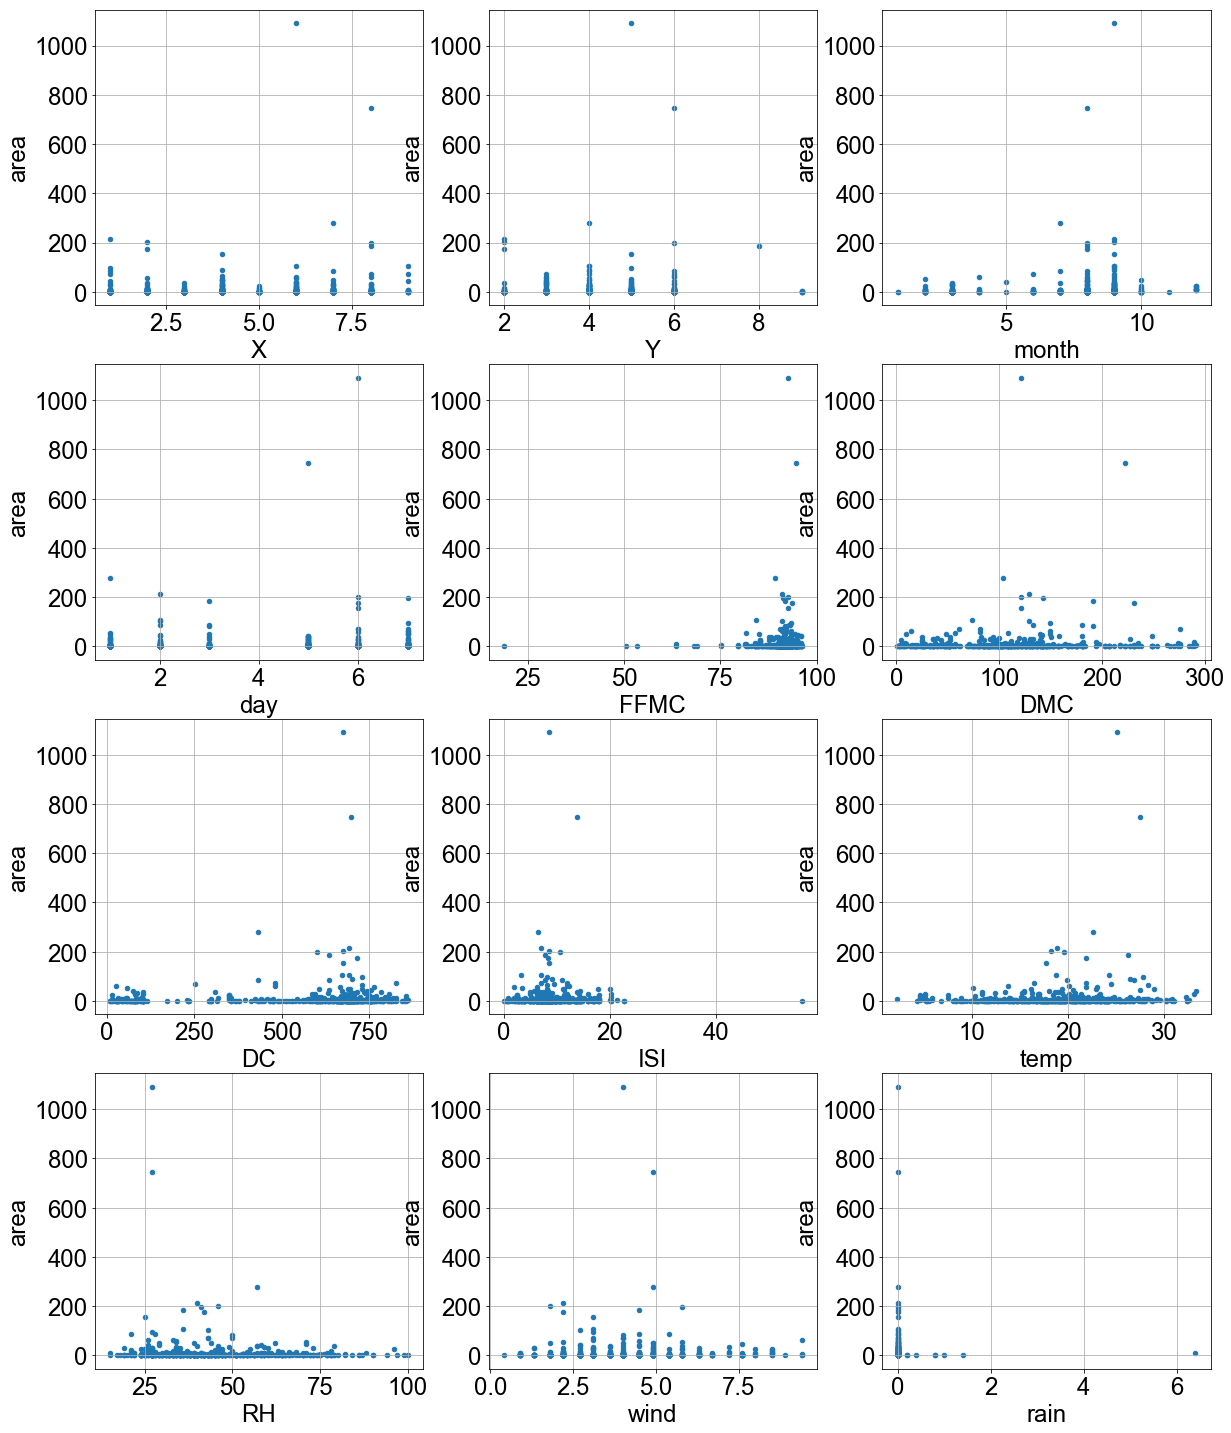

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
for idx, feature in enumerate(fireData.columns[:-1]):
    fireData.plot(feature, "area", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3], grid = True)

Из графиков нельзя точно понять, как они коррелируют. Можно лишь предположить, что есть зависимость от признаков wind, ISI, FFMC.

Разобьём данные на выборку и ответ по ней, перемешаем для точности предсказания.

In [112]:
fireData_sh = shuffle(data, random_state = 123)
X = fireData_sh.drop('area', 1)
y = fireData_sh['area']

Преобразуем категориальные признаки

In [49]:
categorical_cols = ['month', 'day']
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X_cat = X[categorical_cols]
X_cat = X_cat.astype(str)
X_num = X[num_cols]

In [50]:
encoder = DV(sparse = False)
enc = encoder.fit_transform(X_cat.T.to_dict().values())
X_cat_oh = pd.DataFrame(dict(zip(encoder.feature_names_, enc.T)))
X_data = np.hstack((X_num, X_cat_oh))
X_data_keys = X_num.columns.append(X_cat_oh.columns)

### 2. Обучение модели
В первом задании необходимо использовать метод наименьших квадратов с регуляризацией (Ridge), нарисовать график весов признаков и общей ошибки на кросс-валидации при изменении параметра регуляризации.
Какие признаки наиболее важны для нашей задачи?

Chosen alpha is 395.1
('FFMC', -0.0473890623283455)
('DMC', 0.08673984225539755)
('DC', -0.009055294964497307)
('ISI', -0.567611814932321)
('temp', 0.7870743058415277)
('RH', -0.20369288745377645)
('wind', 1.2368252960818467)
('rain', -0.2160975955540223)
('day=fri', -1.2129464713631715)
('day=mon', -0.23005906160404277)
('day=sat', 2.13074621973735)
('day=sun', -0.44109494535160104)
('day=thu', 0.1420620354420703)
('day=tue', -0.03800867350611159)
('day=wed', -0.35069910335449406)
('month=apr', 0.060169807018126784)
('month=aug', -1.2629604179520932)
('month=dec', 0.19209160387007995)
('month=feb', 0.20073585846370512)
('month=jan', 0.03905945569960874)
('month=jul', -0.09974792585414799)
('month=jun', -0.30059199557030963)
('month=mar', -0.5699673562583255)
('month=may', 0.07017491626297015)
('month=nov', -0.02561759765231749)
('month=oct', 0.020902421670244996)
('month=sep', 1.675751230302458)


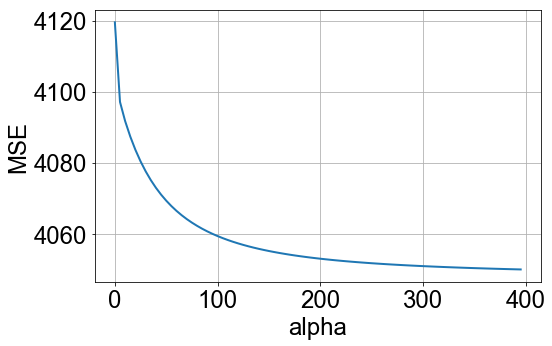

In [55]:
from sklearn.linear_model import RidgeCV

alphas = np.arange(0.1, 400, 5.0)
ridge = RidgeCV(alphas = alphas, store_cv_values=True)
ridge.fit(X_data, y)

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge.cv_values_.mean(axis = 0))
plt.xlabel("alpha", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.grid(True)
print('Chosen alpha is', ridge.alpha_)
for w in zip(X_data_keys, ridge.coef_):
    print (w)

Аналогично для стандартизированных признаков

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num, y)
X_num_scaled = scaler.transform(X_num)
X_scaled = np.hstack((X_num_scaled, X_cat_oh))

Chosen alpha is 580.1
FFMC is 0.3238935770242781
DMC is 1.74175351685669
DC is 0.37683613845303154
ISI is -0.6028728495956983
temp is 2.161793294093049
RH is -1.7477016982796953
wind is 0.9127673784694456
rain is -0.2639058815997346
day=fri is -0.9318250335132733
day=mon is -0.2486114539765768
day=sat is 1.5907839870045681
day=sun is -0.327413989731264
day=thu is 0.2085783370852501
day=tue is -0.03845064280163851
day=wed is -0.2530612040670653
month=apr is 0.02763238812500092
month=aug is -0.563216232381895
month=dec is 0.09011308310024817
month=feb is 0.051499904562715304
month=jan is 0.008624074595723247
month=jul is 0.0308139918793163
month=jun is -0.17340689120439087
month=mar is -0.39055111252959535
month=may is 0.043021373145331415
month=nov is -0.014714172500635479
month=oct is -0.11464545502957552
month=sep is 1.004829048237757


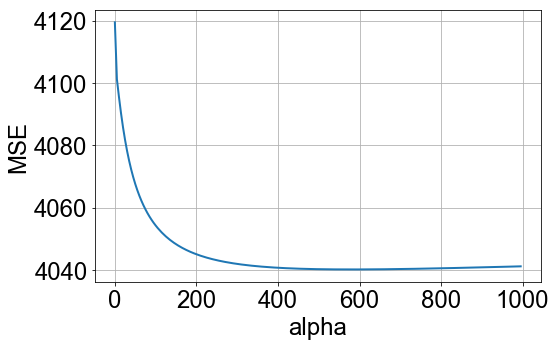

In [91]:
alphas = np.arange(0.1, 1000, 5)
ridge = RidgeCV(alphas = alphas, store_cv_values=True)
ridge.fit(X_scaled, y)

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge.cv_values_.mean(axis=0))
plt.xlabel("alpha", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.grid(True)
print('Chosen alpha is', ridge.alpha_)
for w in zip(X_data_keys, ridge.coef_):
    print (str(w[0]) + " is " + str(w[1]))

### 3.  Графики зависимости весов признаков при изменении параметра регуляризации.

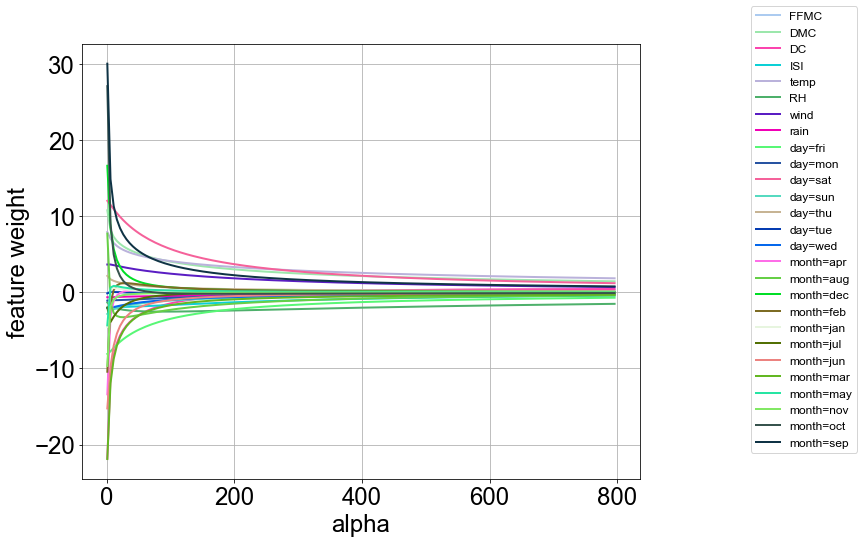

In [69]:
from sklearn.linear_model import Ridge, Lasso

alphasR = np.arange(1, 800, 5.0)
coefs_ridge = np.zeros((alphasR.shape[0], X_scaled.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
# Для каждого значения коэффициента из alphas обучим регрессор Ridge
# и запишим веса в соответствующую строку матрицы coefs_ridge

for i, a in enumerate(alphasR):
    ridge_reg = Ridge(alpha = a)
    ridge_reg.fit(X_scaled, y)
    coefs_ridge[i] += ridge_reg.coef_

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, X_data_keys):
    if np.abs(coef).mean() > 0.03:
        plt.plot(alphasR, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.1), fontsize=12)
plt.xlabel("alpha", fontsize=24)
plt.ylabel("feature weight", fontsize=24)
plt.grid(True)

#https://github.com/Intelligent-Systems-Phystech/StartCode/blob/master/Zainulina2018Problem21/forestfires.ipynb

### 4. Выводы
Исходя из пункта 2, где представлены коэффициенты при параметрах, можно сказать, что параметры temp, RH, DMC самые весомые. Также можно сказать, что основной период пожаров приходится на август-сентябрь.
Пункт 3 (график) подтверждает, что данные параметры являются наиболее значимыми.

# Пробный анализ ошибки
Зависимость значения ошибки и его стандартного отклонения от объема выборки на обучении и контроле. Используем данные, подготовленные в пункте 2

In [124]:
np.arange(10, 517, 5)

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
       205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,
       270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330,
       335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395,
       400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460,
       465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515])

In [140]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

errors = []
alpha = 395.1
volume_of_data = np.arange(10, 517, 5)
np.append(volume_of_data, 517)
for vol in volume_of_data:
    X_train = X_data[0:vol]
    y_train = np.array(y[0:vol].values)
    X_test = X_data[vol:-1]
    y_test = np.array(y[vol:-1].values)
    ridge = RidgeCV(alphas = [alpha])
    ridge.fit(X_train, y_train)
    
    errors.append(mean_squared_error(y_test, np.dot(X_test, ridge.coef_)))
    
#Возможно, неправильно сделано. Но уже 3 ночи, я больше не могу думат

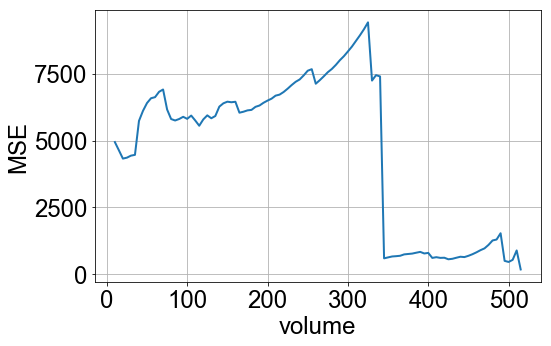

In [143]:
plt.figure(figsize=(8, 5))
plt.plot(list(volume_of_data), errors)
plt.xlabel("volume", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.grid(True)

plt.savefig('MSE(21 task, the second homework).png')